In [1]:
import numpy as np
import matplotlib.pyplot as plt

**In the excercise you can use a build in procedure for generating random numbers. Compare the results obtained in simulations with expected results. Use histograms (and tests).**

**1. Choose a value for the probability parameter p in the geometric distribution and simulate 10,000 outcomes. You can experiment with a small, moderate and large value if you like.**

(array([7.574e+03, 1.192e+03, 9.470e+02, 1.410e+02, 7.200e+01, 6.200e+01,
        8.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <BarContainer object of 10 artists>)

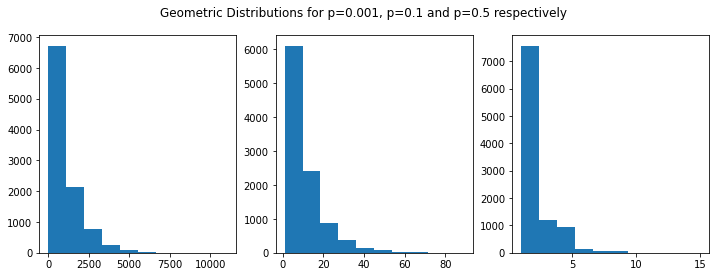

In [7]:
samples1 = np.random.geometric(0.001, 10000)
samples2 = np.random.geometric(0.1, 10000)
samples3 = np.random.geometric(0.5, 10000)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Geometric Distributions for p=0.001, p=0.1 and p=0.5 respectively')
fig.set_size_inches(12, 4)
ax1.hist(samples1)
ax2.hist(samples2)
ax3.hist(samples3)

(array([5509., 2474., 1079.,  513.,  225.,  116.,   35.,   29.,   14.,
           6.]),
 array([5.38458200e-02, 7.90917663e+02, 1.58178148e+03, 2.37264530e+03,
        3.16350911e+03, 3.95437293e+03, 4.74523675e+03, 5.53610056e+03,
        6.32696438e+03, 7.11782820e+03, 7.90869202e+03]),
 <BarContainer object of 10 artists>)

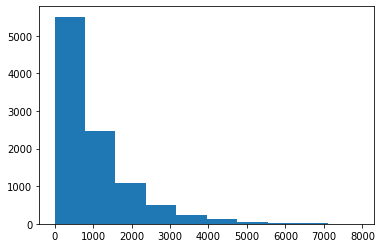

In [10]:
x = np.random.uniform(size=10000)
p = 0.001
y = abs(np.log(x)/np.log(1-p))
plt.hist(y)

2. Simulate the 6 point distribution with

X -> 1 2 3 4 5 6

pi -> 7/48 5/48 1/8 1/16 1/4 5/16

(a) by applying a direct (crude) method

(b) by using the the rejction method

(c) by using the Alias method

10000
[0.14583333333333334, 0.10416666666666667, 0.125, 0.0625, 0.25, 0.3125]


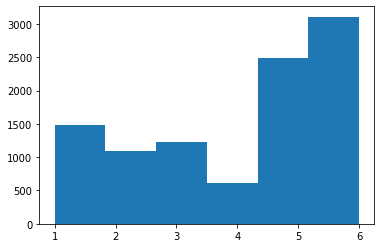

In [11]:
x = np.random.uniform(size=10000)
pi = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]

# direct (crude) method
y = []
for sp in x:
    val = 1
    cumpi = 0
    for i in range(len(pi)):
        cumpi += pi[i]
        if sp <= cumpi:
            y.append(val)
            break
        else:
            val += 1

plt.hist(y, bins=6)
print(len(y))
print(pi)

10000
[0.14583333333333334, 0.10416666666666667, 0.125, 0.0625, 0.25, 0.3125]


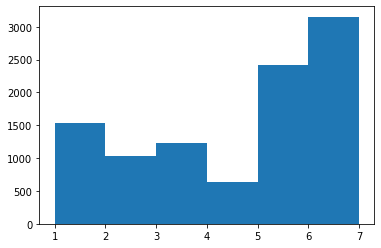

In [12]:
x = np.random.uniform(size=10000)
pi = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]
k = len(pi)
c = max(x)

def identity(k, num):
    return abs(k * num) + 1

y = []
# simple rejection
for i in range(10000):
    go = True
    while go:
        I = identity(k, np.random.uniform())
        pI = pi[int(I-1)]
        if np.random.uniform() <= (pI / c):
            y.append(I)
            go = False

plt.hist(y, bins=6)
print(len(y))
print(pi)

In [24]:
x = np.random.uniform(size=10000)
pi = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]
k = len(pi)
c = max(x)

y = []
# Alias method
F = np.zeros(k)
L = np.zeros(k, dtype=int)
smaller = []
filled = []
larger = []
for idx, prob in enumerate(pi):
    F[idx] = k*prob
    if F[idx] < 1.0:
        smaller.append(idx)
    elif F[idx] == 1.0:
        filled.append(idx)
    else:
        larger.append(idx)

print(F)

while len(smaller) > 0 and len(larger) > 0:
    small = smaller.pop()
    large = larger.pop()

    L[small] = large
    F[large] = F[large] - (1.0 - F[small])
    F[small] = 1.0

    if F[large] < 1.0:
        smaller.append(large)
    elif F[large] == 1.0:
        filled.append(large)
    else:
        larger.append(large)

print(L)
print(F)

[0.875 0.625 0.75  0.375 1.5   1.875]
[4 4 5 5 0 0]
[1. 1. 1. 1. 1. 1.]


10000
[0.14583333333333334, 0.10416666666666667, 0.125, 0.0625, 0.25, 0.3125]


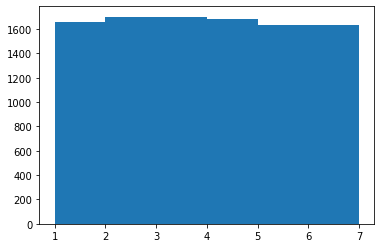

In [26]:
y = []
for i in range(10000):
    I = identity(k, np.random.uniform())
    if np.random.uniform() <= F[int(I-1)]:
        y.append(I)
    else:
        y.append(L[int(I-1)])

plt.hist(y, bins=6)
print(len(y))
print(pi)